<a href="https://colab.research.google.com/github/kimdesok/Atten_Deep_MIL/blob/master/Stock_daily_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [4]:
import urllib
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from urllib.request import urlopen

In [5]:
#KOSPI code + stock name
stock_type = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt'
}

def get_code(df, names):
  codes = list()
  for name in names:
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
    code = code.strip()
    codes.append(code)
  return codes

def get_download_stock(market_type=None):
  market_type_param = stock_type[market_type]
  download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
  download_link = download_link + '?method=download'
  download_link = download_link + '&marketType=' + market_type_param

  df = pd.read_html(download_link, header=0)[0]
  return df;

def get_download_kospi():
  df = get_download_stock('kospi')
  df.종목코드 = df.종목코드.map('{:06d}'.format)
  return df

def get_download_kosdaq():
  df = get_download_stock('kosdaq')
  df.종목코드 = df.종목코드.map('{:06d}'.format)
  return df

kospi_df = get_download_kospi()
kosdaq_df = get_download_kosdaq()



In [6]:
code_df = pd.concat([kospi_df, kosdaq_df])
print(code_df.head())

code_df = code_df[['회사명', '종목코드']]

# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})


         회사명    종목코드           업종  ...      대표자명                    홈페이지     지역
0      DRB동일  004840     고무제품 제조업  ...       류영식     http://drbworld.com  부산광역시
1        DSR  155660  1차 비철금속 제조업  ...       홍석빈      http://www.dsr.com  부산광역시
2      GS글로벌  001250    상품 종합 도매업  ...       김태형  http://www.gsgcorp.com  서울특별시
3  HDC현대산업개발  294870       건물 건설업  ...  권순호, 정경구  http://www.hdc-dvp.com  서울특별시
4        KEC  092220      반도체 제조업  ...   박남규 김학남    http://www.kec.co.kr  서울특별시

[5 rows x 9 columns]


In [ ]:
!git clone "https://github.com/FinanceData/marcap.git" marcap

In [ ]:
#!ls -lh marcap/data 
!cp -r   '/content/drive/MyDrive/marcap'

In [8]:
!cp -r '/content/drive/MyDrive/marcap'  marcap

In [ ]:
from marcap import marcap_data
from datetime import date
today = date.today()

#Select dates
start_date = '2018-01-01'
stock_data = marcap_data(start_date, today)
#print(stock_data[['Code', 'Name', 'Open', 'High', 'Low', 'Close', 'Volume']].tail(10))

#For this exercise, we need two dataframes
lng_df = stock_data[stock_data['Name'] == '피씨엘']
spy_df = stock_data[stock_data['Name'] == '이아이디']

#print(lng_df[['Code', 'Name', 'Open', 'High', 'Low', 'Close', 'Volume']])
#print(spy_df[['Code', 'Name', 'Open', 'High', 'Low', 'Close', 'Volume']])

print(lng_df.info())
print(spy_df.info())

In [ ]:
#Data transform using the close price
#price_data = stock_data.pivot_table(index='Date', columns='Code', values=['Close', 'Volume'])
lng_df = lng_df.pivot_table(index='Date', values=['Close', 'Volume'])
lng_df.columns = ['Adj_Close', 'Adj_Volume']
print(lng_df.tail())
spy_df = spy_df.pivot_table(index='Date', values=['Close', 'Volume'])
spy_df.columns = ['Adj_Close', 'Adj_Volume']
print(spy_df.tail())

In [8]:
#한글 폰트 지정
plt.rc('font', family='NanumBarunGothic') 

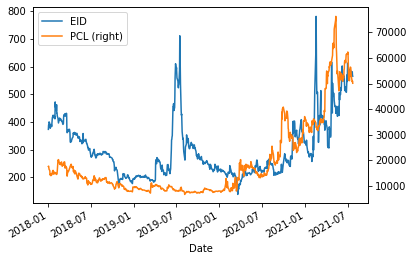

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_

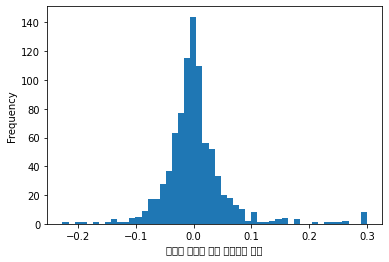

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46356 missing from current font.
  font.set_text

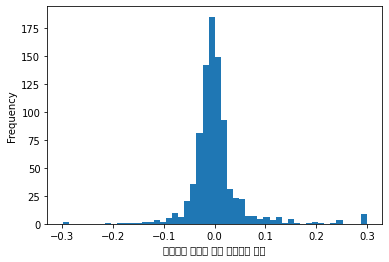

<Figure size 432x288 with 0 Axes>

In [11]:
spy_df['Adj_Close'].plot(label='EID', legend=True)
lng_df['Adj_Close'].plot(label="PCL", legend=True, secondary_y=True)
#plt.ylabel('피씨엘 종가')
plt.show()  # show the plot


# Histogram of the daily price change percent of Adj_Close for LNG
lng_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('피씨엘 종가의 일일 퍼센티지 변화')
plt.show()

spy_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('이아이디 종가의 일일 퍼센티지 변화')
plt.show()

plt.clf()  # clear the plot space

                     5d_close_pct  5d_close_future_pct
5d_close_pct              1.00000             -0.02462
5d_close_future_pct      -0.02462              1.00000


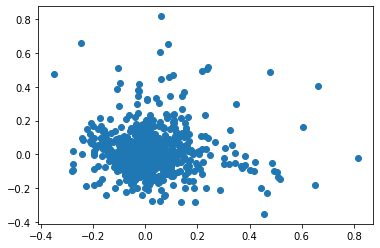

In [12]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
lng_df['5d_future_close'] = lng_df['Adj_Close'].shift(-5)
lng_df['5d_close_future_pct'] = lng_df['5d_future_close'].pct_change(5)
lng_df['5d_close_pct'] = lng_df['Adj_Close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = lng_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(lng_df['5d_close_pct'], lng_df['5d_close_future_pct'])
plt.show()

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install

# try below first
!pip install Ta-Lib
import talib

In [23]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    np_real_data = np.array(lng_df['Adj_Close'].values, dtype='f8')  #talib does not like double data. Try double float
    lng_df['ma' + str(n)] = talib.SMA(np_real_data, timeperiod=n) / lng_df['Adj_Close']

    # Create the RSI indicator
    lng_df['rsi' + str(n)] = talib.RSI(np_real_data, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


In [24]:
# Drop all na values
lng_df = lng_df.dropna()

# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = lng_df[feature_names]
targets = lng_df['5d_close_future_pct'].values

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = lng_df[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct  5d_close_pct  ...     ma200    rsi200
5d_close_future_pct             1.000000      0.008819  ...  0.008240 -0.007823
5d_close_pct                    0.008819      1.000000  ... -0.291117  0.261481
ma14                            0.022974     -0.839415  ...  0.353395 -0.319718
rsi14                          -0.050301      0.640733  ... -0.588002  0.569586
ma30                            0.062165     -0.645503  ...  0.517142 -0.467122
rsi30                          -0.078828      0.544591  ... -0.754415  0.744276
ma50                            0.086597     -0.525993  ...  0.667792 -0.602154
rsi50                          -0.072904      0.471501  ... -0.862826  0.865155
ma200                           0.008240     -0.291117  ...  1.000000 -0.919250
rsi200                         -0.007823      0.261481  ... -0.919250  1.000000

[10 rows x 10 columns]


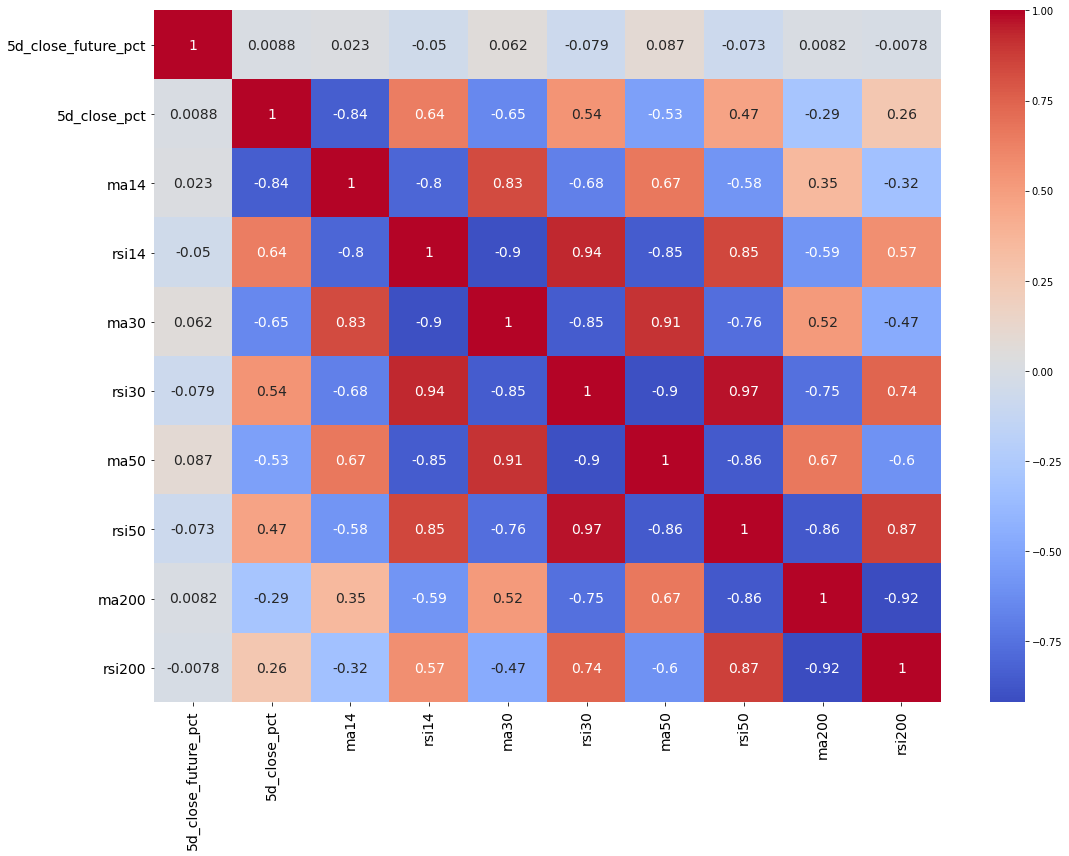

In [32]:
import seaborn as sns
# Plot heatmap of correlation matrix
plt.figure(figsize = (16,12))
sns.heatmap(corr, annot= True, annot_kws = {"size": 14}, cmap='coolwarm')
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot